In [1]:
import pandas as pd
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
from math import floor
from matplotlib.patches import Patch
from datetime import timedelta

In [2]:
# comments filtered by tonevents regex
data = pd.read_csv("data.csv").rename(columns={'m.source': 'source'})
for f in ['import_fee', 'op']:
    data[f] = data[f].astype('Int32')

NORMALIZE_COMMENTS_RE = [
    ("(Get [0-9.]* TON)", 'Get ? TON'),
    ("(https://ton\.events)", 'ton.events'),
    ("(Get [0-9.]* now)", "Get ? now"),
    ("(Get [0-9.]* tᴏn now)", "Get ? tᴏn now"),
    ("(https://tonevents\.org)", 'tonevents.org'),
    ("(https://ton-events\.com)", 'ton-events.com'),    
    ("up to 100 TON", ""),
    ("/$", ""),
    ("  ", " ")
]
data['comment_sanityze'] = data['comment']
for regexp, s in tqdm(NORMALIZE_COMMENTS_RE):
    data['comment_sanityze'] = data['comment_sanityze'].map(lambda x: re.sub(regexp, s, x) if type(x) == str else x)
data.sample(n=3).transpose()

,8228,15857,24274
comment,Get 17.85 TON from TON Foundation https://ton....,Get 83.48 TON from TON Foundation https://ton....,TON Foundation Airdrop up to 100 TON https://t...
created_lt,31576590000003,32317381000005,31340359000050
source,EQDb8po_y9Hfd16THXCLlReT17llVJV5gZUn9i14NeyGulyw,EQDaKQ3QCi3p69El4T7jDv2qybJzzpNHX-22GguOXpude5tP,EQBmMV6kW0w4n-zoOdVxv4UlgYC1sGPp1EgDk9r3XqA0OdQZ
destination,EQD-cmZzFIZJmDZW40puCIpDXHm7fVjZlvgsomzbuTgPLKD6,EQD_U5sFl-EYkvmlXS3PEEDkYjvkE91VVJGHZ4wqTlxNT1V2,EQCvGdCGktgM6KK9LtYiNYKRdRfxeiuh_nFFnBl8iMC878Tt
bounce,True,False,True
bounced,False,False,False
fwd_fee,1074675,1074675,1048008
ihr_disabled,True,True,True
ihr_fee,0,0,0
import_fee,<NA>,<NA>,<NA>


In [3]:
# more sophisticated scam messages
more_messages = pd.read_csv("more_spam_messages.csv").rename(columns={'utime':'m.utime'})
more_messages.head()

,msg_id,comment,source,destination,value,m.utime
0,12424748,TONWhales Staking up to 25%. Send deposit on t...,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw,EQDXQfWRfsFIbTNDHaFGDQ1rd3h2afIMLUtK2hIEwMrTr4C0,100,1653581716
1,12424700,TONWhales Staking up to 25%. Send deposit on t...,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw,EQAhyLnzojstMKetIb1iOuYbTvsvwBM2SFI4syGsVGmeIlhr,100,1653581716
2,12424701,TONWhales Staking up to 25%. Send deposit on t...,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw,EQAnA-hHK3hkUr39NrpqGnwa4w5FtGSb__-oKUh9dWyFBwld,100,1653581716
3,12424702,TONWhales Staking up to 25%. Send deposit on t...,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw,EQAsDAivl0dqF-_u7Ft-_JbZz6tZqGcoMKgx7G6flZ54v30J,100,1653581716
4,12424712,TONWhales Staking up to 25%. Send deposit on t...,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw,EQBAOyLNtOJ5jVqHuIxBGZw0LT9N0EdEght2WIT_TegQItPi,100,1653581716


In [4]:
# fake whales messages
fake_whales = pd.read_csv("fake_whales.csv").rename(columns={'utime':'m.utime', 'comment': 'text'})
fake_whales['kind'] = 'Fake Whales'
fake_whales.head()

,msg_id,source,destination,value,text,m.utime,kind
0,8580257,EQCvAJAtxdBgXLykH9191w2WCo9N8qgLfhFTBV8dT2Whales,EQC-42RObs0WDdUbAJatJFY6PAME_w6cz5c8_5Ct7ASUtp4T,10000,TONWhales staking deposit accepted,1656586200,Fake Whales
1,8547453,EQCvAJAtxdBgXLykH9191w2WCo9N8qgLfhFTBV8dT2Whales,EQB5d9serugQ5cJAwLszZrbvnejr79rNkHttIDy2rPntRRsz,10000,TON Whales staking bonus 100 ton for first 50 ...,1656622686,Fake Whales
2,8547454,EQCvAJAtxdBgXLykH9191w2WCo9N8qgLfhFTBV8dT2Whales,EQB6Ru_RLvsjZ9aa5XFZn09cz8L2gGVnosYAJyh4oKDNTVYY,100000,TON Whales staking bonus 100 ton for first 50 ...,1656622686,Fake Whales
3,8547455,EQCvAJAtxdBgXLykH9191w2WCo9N8qgLfhFTBV8dT2Whales,EQB-VqRKEvzNd3-2uk7BqQBoGFZghGXhC1OKLu1-lBUmt8LY,10000,TON Whales Staking pool - 22% percents for 100...,1656622686,Fake Whales
4,8547392,EQCvAJAtxdBgXLykH9191w2WCo9N8qgLfhFTBV8dT2Whales,EQAUDuL4sGVlN0DwrWmED_5-EiUxVnWsySt_SrbaN_x-Rjlp,10000,TONWhales Staking 19.34% for any new deposits....,1656622686,Fake Whales


In [5]:
comments_mapping_v1 = pd.read_csv("ton_comments_mapping.csv", sep="\t")
comments_mapping_v2 = pd.read_csv("ton_comments_mapping_more.csv", sep="\t")

data_v2 = pd.concat([
    data[['msg_id', 'source', 'destination', 'm.utime', 'comment_sanityze', 'value']]\
        .merge(comments_mapping_v1, left_on="comment_sanityze", right_on="text", how="left")\
        .drop("comment_sanityze", axis=1),
    more_messages[['msg_id', 'source', 'destination', 'm.utime', 'comment', 'value']]\
        .merge(comments_mapping_v2, left_on="comment", right_on="text", how="left")\
        .drop("comment", axis=1),
    fake_whales[['msg_id', 'source', 'destination', 'm.utime', 'value', 'text', 'kind']]
])

# group by scam message kind
comment_stat_v2 = data_v2\
.groupby("kind").agg(
    value=('value', 'sum'),
    senders=('source', 'nunique'),
    destinations=('destination', 'nunique'),
    source_sample=('source', 'first'),    
    sent=('msg_id', 'nunique'),
    min_time=('m.utime', 'min'),
    max_time=('m.utime', 'max'),
).reset_index().sort_values(by='sent', ascending=False)

def exrtact_domain_v2(s):
    domains = set()
    for d in ['tonevents.org', 'ton-events.com', 'ton.events', 'TONWhales']:
        if d in s:
            domains.add(d)
    if s == 'TON Foundation Airdrop' or s == 'TON Airdrop' or s == 'TON Airdrop' \
        or s == 'TON Airdrop (A/B?)' or s == '$KOTE Airdrop':
        domains.add('ton.events')
    if s == 'Fake Whales':
        domains.add('Fake Whales')
    assert len(domains) < 2
    return list(domains)[0] if len(domains) == 1 else None

comment_stat_v2['domain'] = comment_stat_v2.kind.map(exrtact_domain_v2)
comment_stat_v2.loc[comment_stat_v2.domain.isnull(), 'domain'] = 'NFT scam'
comment_stat_v2['title'] = comment_stat_v2['kind']#.map(lambda x: x\
                                                   #   .replace(" (tonevents.org)", ""))


comment_stat_v2['value'] /=  1000000000.
comment_stat_v2['start_date'] = pd.to_datetime(comment_stat_v2['min_time'],unit='s').dt.date
comment_stat_v2['end_date'] = pd.to_datetime(comment_stat_v2['max_time'],unit='s').dt.date
comment_stat_v2.query("sent > 50").sort_values(by="min_time")[['title' ,'senders', 
                                                               'destinations', 'start_date', 'end_date', 'source_sample']]


,title,senders,destinations,start_date,end_date,source_sample
18,TONWhales staking,18,4716,2022-05-26,2022-05-29,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw
16,TON GUYS NFT,1,655,2022-05-26,2022-05-27,EQA5SFxmsHjfHAyOY6xgRw5cjfg7OG_I7I8F6YZlit-wko3n
13,TON Earth,1,1380,2022-05-26,2022-05-26,EQBokM8Iv2qT5GR50k6_cyPxNxRJwU9RwzJlo7IsU7xXxqhh
2,BITON $BTN,1,1050,2022-05-28,2022-05-28,EQAlrR_Tl-aZXrvfpQIUgPPhrUdX6VGco0PaHlVwhm9_uAwl
1,@StakingCATBot,2,464,2022-05-30,2022-05-30,EQAOexD2FAcT64i9S9vjU_63sslexuRUJ8wqUtSUvwhKvjJo
6,G-BOTS NFT,5,898,2022-05-30,2022-06-01,EQDmcw5e5AqnQHjbsbLCoEw-Dt-7HPrUFOnVVshupYIQVhQI
17,TONStake,2,640,2022-05-31,2022-05-31,EQDUHRTbbK6_LeAD3NLkzif8YlSV78riscFUG96H5byzM0Ws
11,TON COIN,1,313,2022-05-31,2022-06-01,EQD6An6KUSgBisaSzwedJGy27kkWC7csueGFskKE_M86ECUp
12,TON Diamonds,2,1416,2022-06-01,2022-06-01,EQAif6cl3ZfHbgI9UtVQoUOPn4hDnlFyzJSzuZTzHhudRZQv
7,Rich Cats NFT,1,190,2022-06-01,2022-06-01,EQDmcw5e5AqnQHjbsbLCoEw-Dt-7HPrUFOnVVshupYIQVhQI


In [6]:
data_v2 = pd.concat([
    data[['msg_id', 'source', 'destination', 'm.utime', 'comment_sanityze', 'value']]\
        .merge(comments_mapping_v1, left_on="comment_sanityze", right_on="text", how="left")\
        .drop("comment_sanityze", axis=1),
    more_messages[['msg_id', 'source', 'destination', 'm.utime', 'comment', 'value']]\
        .merge(comments_mapping_v2, left_on="comment", right_on="text", how="left")\
        .drop("comment", axis=1),
    fake_whales[['msg_id', 'source', 'destination', 'm.utime', 'value', 'text', 'kind']]
])


comment_stat_v2 = data_v2\
.groupby("kind").agg(
    value=('value', 'sum'),
    senders=('source', 'nunique'),
    destinations=('destination', 'nunique'),
    source_sample=('source', 'first'),    
    sent=('msg_id', 'nunique'),
    min_time=('m.utime', 'min'),
    max_time=('m.utime', 'max'),
).reset_index().sort_values(by='sent', ascending=False)

def exrtact_domain_v2(s):
    domains = set()
    for d in ['tonevents.org', 'ton-events.com', 'ton.events', 'TONWhales']:
        if d in s:
            domains.add(d)
    if s == 'TON Foundation Airdrop' or s == 'TON Airdrop' or s == 'TON Airdrop' \
        or s == 'TON Airdrop (A/B?)' or s == '$KOTE Airdrop':
        domains.add('ton.events')
    if s == 'Fake Whales':
        domains.add('Fake Whales')
    assert len(domains) < 2
    return list(domains)[0] if len(domains) == 1 else None

comment_stat_v2['domain'] = comment_stat_v2.kind.map(exrtact_domain_v2)
comment_stat_v2.loc[comment_stat_v2.domain.isnull(), 'domain'] = 'NFT scam'
comment_stat_v2['title'] = comment_stat_v2['kind']


comment_stat_v2['value'] /=  1000000000.
comment_stat_v2['start_date'] = pd.to_datetime(comment_stat_v2['min_time'],unit='s').dt.date
comment_stat_v2['end_date'] = pd.to_datetime(comment_stat_v2['max_time'],unit='s').dt.date
comment_stat_v2.query("sent > 50").sort_values(by="min_time")[['title' ,'senders', 
                                                               'destinations', 'start_date', 'end_date', 'source_sample']].reset_index()


,index,title,senders,destinations,start_date,end_date,source_sample
0,18,TONWhales staking,18,4716,2022-05-26,2022-05-29,EQDb3uQeKdmlBNiqyIG0HQVnSbDIRKMRLca9XLE0q-5lCLDw
1,16,TON GUYS NFT,1,655,2022-05-26,2022-05-27,EQA5SFxmsHjfHAyOY6xgRw5cjfg7OG_I7I8F6YZlit-wko3n
2,13,TON Earth,1,1380,2022-05-26,2022-05-26,EQBokM8Iv2qT5GR50k6_cyPxNxRJwU9RwzJlo7IsU7xXxqhh
3,2,BITON $BTN,1,1050,2022-05-28,2022-05-28,EQAlrR_Tl-aZXrvfpQIUgPPhrUdX6VGco0PaHlVwhm9_uAwl
4,1,@StakingCATBot,2,464,2022-05-30,2022-05-30,EQAOexD2FAcT64i9S9vjU_63sslexuRUJ8wqUtSUvwhKvjJo
5,6,G-BOTS NFT,5,898,2022-05-30,2022-06-01,EQDmcw5e5AqnQHjbsbLCoEw-Dt-7HPrUFOnVVshupYIQVhQI
6,17,TONStake,2,640,2022-05-31,2022-05-31,EQDUHRTbbK6_LeAD3NLkzif8YlSV78riscFUG96H5byzM0Ws
7,11,TON COIN,1,313,2022-05-31,2022-06-01,EQD6An6KUSgBisaSzwedJGy27kkWC7csueGFskKE_M86ECUp
8,12,TON Diamonds,2,1416,2022-06-01,2022-06-01,EQAif6cl3ZfHbgI9UtVQoUOPn4hDnlFyzJSzuZTzHhudRZQv
9,7,Rich Cats NFT,1,190,2022-06-01,2022-06-01,EQDmcw5e5AqnQHjbsbLCoEw-Dt-7HPrUFOnVVshupYIQVhQI


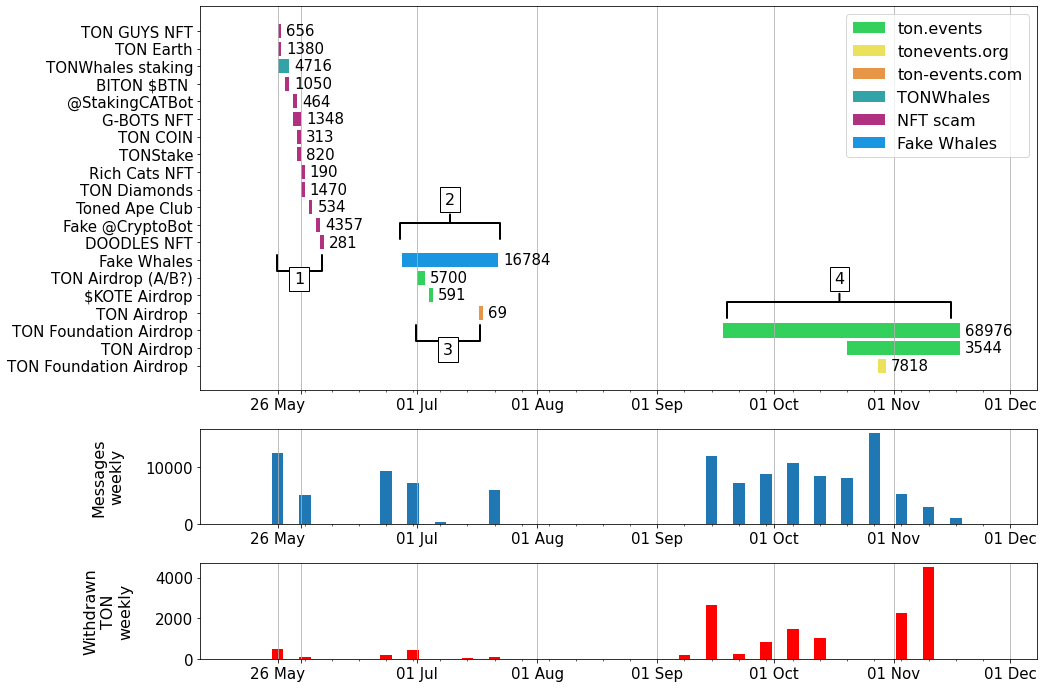

In [8]:
# gantt-style chart
gantt = comment_stat_v2.copy()
gantt.loc[gantt.title == 'TON Foundation Airdrop (tonevents.org)', 'title'] = "TON Foundation Airdrop "
gantt.loc[gantt.title == 'TON Airdrop (ton-events.com)', 'title'] = "TON Airdrop "
gantt['start_date'] = pd.to_datetime(gantt['min_time'],unit='s').dt.date
gantt['end_date'] = pd.to_datetime(gantt['max_time'],unit='s').dt.date
spam_start = gantt.start_date.min()
gantt['start_num'] = (gantt.start_date - spam_start).dt.days
gantt['end_num'] = (gantt.end_date-spam_start).dt.days
gantt['days_start_to_end'] = gantt.end_num - gantt.start_num
gantt.loc[gantt['days_start_to_end'] == 0, 'days_start_to_end'] = 1
gantt = gantt.sort_values(by='start_num', ascending=False).reset_index()
# palette
c_dict = {'ton.events':'#34D05C', 'tonevents.org':'#ebe15b', 'ton-events.com':'#E69646', 
          'TONWhales': '#32a4a8', 'NFT scam': '#b0317f', 'Fake Whales': '#1a95e0'}
def color(row):
    return c_dict[row['domain']]
gantt['color'] = gantt.apply(color, axis=1)

# fraud timeline
fraud_amount = pd.read_csv("fraud_amount_bydate.csv").sort_values(by='utime')
fraud_amount['fraud_date'] = pd.to_datetime(fraud_amount['utime'],infer_datetime_format=True).dt.date
fraud_amount['date_idx'] = (fraud_amount.fraud_date - spam_start).dt.days

# base plots
fig, axs = plt.subplots(3, figsize=(15,12), height_ratios=[4, 1, 1])
ax = axs[0]
dynamics_ax = axs[1]
fraud_graph = axs[2]
hbars = ax.barh(gantt.title, gantt.days_start_to_end, left=gantt.start_num, color=gantt.color)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.bar_label(hbars, labels=gantt.sent, label_type='edge', padding=5,size=15)

# legend
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
ax.legend(handles=legend_elements, prop={'size': 16})

# date ticks
xticks = [0, 6]
xticks_labels = [spam_start.strftime("%d %b"), '']
start = spam_start + timedelta(days=36) # from 26 may to 1 jul
for month in range(gantt.start_date.min().month, gantt.start_date.max().month + 1):
    label = start.strftime("%d %b")
    xticks.append((start - spam_start).days)
    xticks_labels.append(label)
    start = (start + pd.DateOffset(months=1)).date()

for axis in [ax, dynamics_ax, fraud_graph]:
    axis.set_xticks(xticks)
    axis.set_xticks(np.arange(0, gantt.end_num.max()+10, 7), minor=True)
    axis.set_xticklabels(xticks_labels)

    axis.set_xlim([-20, gantt.end_num.max() + 20])
    axis.grid(axis = 'x')
    axis.tick_params(axis='both', which='major', labelsize=15)

# Sending stat
scam_messages = data_v2.merge(gantt['kind'], left_on='kind', right_on='kind')
scam_messages['days_since_start'] = (pd.to_datetime(scam_messages['m.utime'],unit='s').dt.date - spam_start).dt.days

scam_dynamics = scam_messages.groupby("days_since_start").agg(
    messages_sent=('destination', 'count'),
    value_sent=('value', 'sum'),
    total_senders=('source', 'nunique')
).reset_index()
scam_dynamics['value_sent'] = scam_dynamics['value_sent'] / 1000000000

scam_dynamics['days_since_start_week'] = scam_dynamics['days_since_start'].map(lambda x: floor(x / 7.) * 7)
scam_dynamics_weekly = scam_dynamics.groupby("days_since_start_week").messages_sent.sum().reset_index()

dynamics_ax.bar(scam_dynamics_weekly.days_since_start_week, scam_dynamics_weekly.messages_sent, width=3)
dynamics_ax.set_ylabel("Messages\nweekly\n", fontsize='medium')
dynamics_ax.yaxis.label.set_size(16)

fraud_amount['date_idx_week'] = fraud_amount['date_idx'].map(lambda x: floor(x / 7.) * 7)
fraud_amount_weekly = fraud_amount.groupby("date_idx_week").fraud_sum.sum().reset_index()

fraud_graph.bar(fraud_amount_weekly.date_idx_week, fraud_amount_weekly.fraud_sum, color='red', width=3)
fraud_graph.set_ylabel("Withdrawn\nTON\nweekly\n", fontsize='medium')
fraud_graph.yaxis.label.set_size(16)
fraud_graph.yaxis.set_label_position("left")

annotation_size = 16

# hardcoded brackets-style annotations to highlight four scam streams
ax.annotate('1', xy=(5.6, 5.5), xytext=(5.6,4.5), xycoords='data', 
            fontsize=annotation_size, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=1.4, lengthB=1', lw=2.0))

ax.annotate('2', xy=(32 + 3.125*4, 8), xytext=(32+ 3.125*4,9), xycoords='data', 
            fontsize=annotation_size, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=3.125, lengthB=1', lw=2.0))

ax.annotate('3', xy=(36 + 2*4, 1.5), xytext=(36+ 2*4,0.5), xycoords='data', 
            fontsize=annotation_size, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1', lw=2.0))

ax.annotate('4', xy=(115 + 7*4+2, 3.5), xytext=(115+ 7*4+2,4.5), xycoords='data', 
            fontsize=annotation_size, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7, lengthB=1', lw=2.0))
plt.show()
